### Klasifikasi Gambar

In [1]:
import wget
import os
import zipfile

In [2]:
url = 'https://github.com/dicodingacademy/assets/raw/main/ml_pengembangan_academy/Chessman-image-dataset.zip'
name = 'Chessman-image-dataset.zip'
base_dir = './tmp'
path = f'{base_dir}/{name}'

if os.path.exists('./tmp/Chessman-image-dataset.zip'):
    print('Dataset sudah ada')
else:
    base_dir = './tmp'

    # Membuat direktori jika belum ada
    os.makedirs(base_dir, exist_ok=True)

    # download dataset
    wget.download(url, path)

Dataset sudah ada


In [3]:
# ekstrak file zip

if os.path.exists('./tmp/Chessman-image-dataset'):
    print('Dataset sudah diekstrak')
else:
    local_zip = path
    zip_ref = zipfile.ZipFile(local_zip, 'r')
    zip_ref.extractall(base_dir)
    zip_ref.close()

Dataset sudah diekstrak


In [4]:
# melihat isi direktori

os.listdir(base_dir+'/Chessman-image-dataset/Chess')

['Bishop', 'King', 'Knight', 'Pawn', 'Queen', 'Rook']

In [5]:
# cek jumlah data tiap kelas

print('total pawn images :', len(os.listdir('./tmp/Chessman-image-dataset/Chess/Pawn')))
print('total King images :', len(os.listdir('./tmp/Chessman-image-dataset/Chess/King')))
print('total Knight images :', len(os.listdir('./tmp/Chessman-image-dataset/Chess/Knight')))

total pawn images : 107
total King images : 76
total Knight images : 106


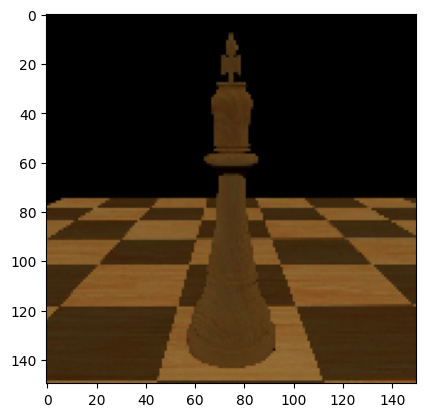

In [6]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
img = image.load_img('./tmp/Chessman-image-dataset/Chess/King/00000145.png', target_size=(150, 150))
imgplot = plt.imshow(img)

In [7]:
# Augmentasi Gambar
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = os.path.join('./tmp/Chessman-image-dataset/Chess')
train_datagen = ImageDataGenerator(
  rescale=1./255, # ubah skala pixel menjadi 0 sampai 1
  rotation_range=20, 
  zoom_range=0.2, 
  shear_range=0.2, 
  fill_mode='nearest',
  validation_split=0.1 # set validation split, 0.1 berarti 10% data akan dijadikan validation set
)

In [8]:
# Membuat objek image data generator sekaligus membagi data menjadi data training dan data validasi

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150), # mengubah resolusi seluruh gambar menjadi 150x150 pixel
    batch_size=8,
    class_mode='categorical',
    subset='training') # set as training data
    
validation_generator = train_datagen.flow_from_directory(
    train_dir, # same directory as training data
    target_size=(150, 150), # mengubah resolusi seluruh gambar menjadi 150x150 pixel
    batch_size=16,
    class_mode='categorical',
    subset='validation')


Found 499 images belonging to 6 classes.
Found 52 images belonging to 6 classes.


In [9]:
# membuat arsitektur CNN

import tensorflow as tf

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.4),  
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.4),  
    # Flatten the results to feed into a DNN, agar bisa digunakan di layer Dense 
    tf.keras.layers.Flatten(), # mengubah matriks 2 dimensi menjadi vektor 1 dimensi
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')  
])

In [10]:
# compile model dengan 'adam' optimizer loss function 'categorical_crossentropy'

model.compile(optimizer=tf.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

In [11]:
# latih model dengan model.fit

history = model.fit(train_generator,
                              validation_data=validation_generator,
                              epochs=50,
                              verbose=2)

Epoch 1/50
63/63 - 26s - loss: 1.9038 - accuracy: 0.1683 - val_loss: 1.7901 - val_accuracy: 0.1923 - 26s/epoch - 412ms/step
Epoch 2/50
63/63 - 20s - loss: 1.7856 - accuracy: 0.1764 - val_loss: 1.7901 - val_accuracy: 0.1923 - 20s/epoch - 320ms/step
Epoch 3/50
63/63 - 23s - loss: 1.7838 - accuracy: 0.1804 - val_loss: 1.7851 - val_accuracy: 0.2115 - 23s/epoch - 364ms/step
Epoch 4/50
63/63 - 24s - loss: 1.7662 - accuracy: 0.2305 - val_loss: 1.7842 - val_accuracy: 0.2500 - 24s/epoch - 378ms/step
Epoch 5/50
63/63 - 24s - loss: 1.7304 - accuracy: 0.2605 - val_loss: 1.7373 - val_accuracy: 0.3654 - 24s/epoch - 384ms/step
Epoch 6/50
63/63 - 23s - loss: 1.7198 - accuracy: 0.2906 - val_loss: 1.7048 - val_accuracy: 0.2500 - 23s/epoch - 367ms/step
Epoch 7/50
63/63 - 24s - loss: 1.6889 - accuracy: 0.3206 - val_loss: 1.6753 - val_accuracy: 0.4038 - 24s/epoch - 374ms/step
Epoch 8/50
63/63 - 24s - loss: 1.6410 - accuracy: 0.3407 - val_loss: 1.6992 - val_accuracy: 0.2692 - 24s/epoch - 383ms/step
Epoch 9/

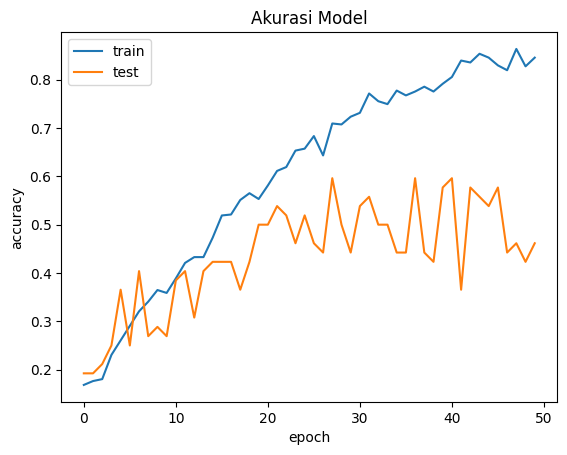

In [12]:
# plot akurasi 

import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

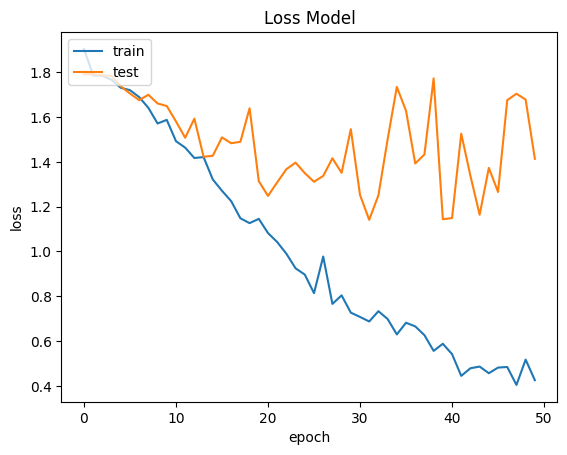

In [13]:
# plot loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Transfer Learning

In [14]:
# membuat model baru dengan transfer learning

import tensorflow as tf
from tensorflow.keras.layers import Input
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import ResNet152V2

model = tf.keras.models.Sequential([
    ResNet152V2(weights="imagenet", include_top=False, input_tensor=Input(shape=(150, 150, 3))),
    # tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')  
])
model.layers[0].trainable = False

## weight='imagenet' : menggunakan weight dari model yang sudah dilatih pada dataset imagenet
## include_top=False : menghilangkan layer output pada model
## input_tensor=Input(shape=(150, 150, 3)) : mengubah input shape dari model

In [15]:
# menentukan loss function dan optimizer

model.compile(optimizer=tf.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

In [16]:
# latih model dengan model.fit

history = model.fit(train_generator,
                              validation_data=validation_generator,
                              epochs=50,
                              verbose=2)

# lama ngerunnya :)

Epoch 1/50
63/63 - 64s - loss: 9.5304 - accuracy: 0.4449 - val_loss: 6.4666 - val_accuracy: 0.5385 - 64s/epoch - 1s/step
Epoch 2/50
63/63 - 56s - loss: 2.3710 - accuracy: 0.6473 - val_loss: 2.1996 - val_accuracy: 0.6538 - 56s/epoch - 887ms/step
Epoch 3/50
63/63 - 54s - loss: 1.2044 - accuracy: 0.7575 - val_loss: 1.7376 - val_accuracy: 0.6538 - 54s/epoch - 851ms/step
Epoch 4/50
63/63 - 51s - loss: 0.9168 - accuracy: 0.7956 - val_loss: 2.0538 - val_accuracy: 0.5962 - 51s/epoch - 802ms/step
Epoch 5/50
63/63 - 54s - loss: 1.0888 - accuracy: 0.7936 - val_loss: 1.5650 - val_accuracy: 0.7115 - 54s/epoch - 850ms/step
Epoch 6/50
63/63 - 57s - loss: 1.1847 - accuracy: 0.8056 - val_loss: 3.4232 - val_accuracy: 0.5962 - 57s/epoch - 908ms/step
Epoch 7/50


KeyboardInterrupt: 